In [2]:
import funcs
import mrsobs

from matplotlib import pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

We load the images for one band of the MRS for different kinds of sources, including:  

* MIRI 800K BB internal calibration source

Contamination Control Cover closed for internal calibration source observations, no background exposures taken.

We extract a detector pixel trace based on:  
* slice number and along-slice position (need geometric distortion calibration information for the latter)

In [3]:
# Define paths to data
workDir = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir  = workDir+'cdp_data/'
d2cMapDir = workDir+'notebooks/distortionMaps/'
lvl2path  = workDir+'CV3_data/LVL2/'

<IPython.core.display.Javascript object>


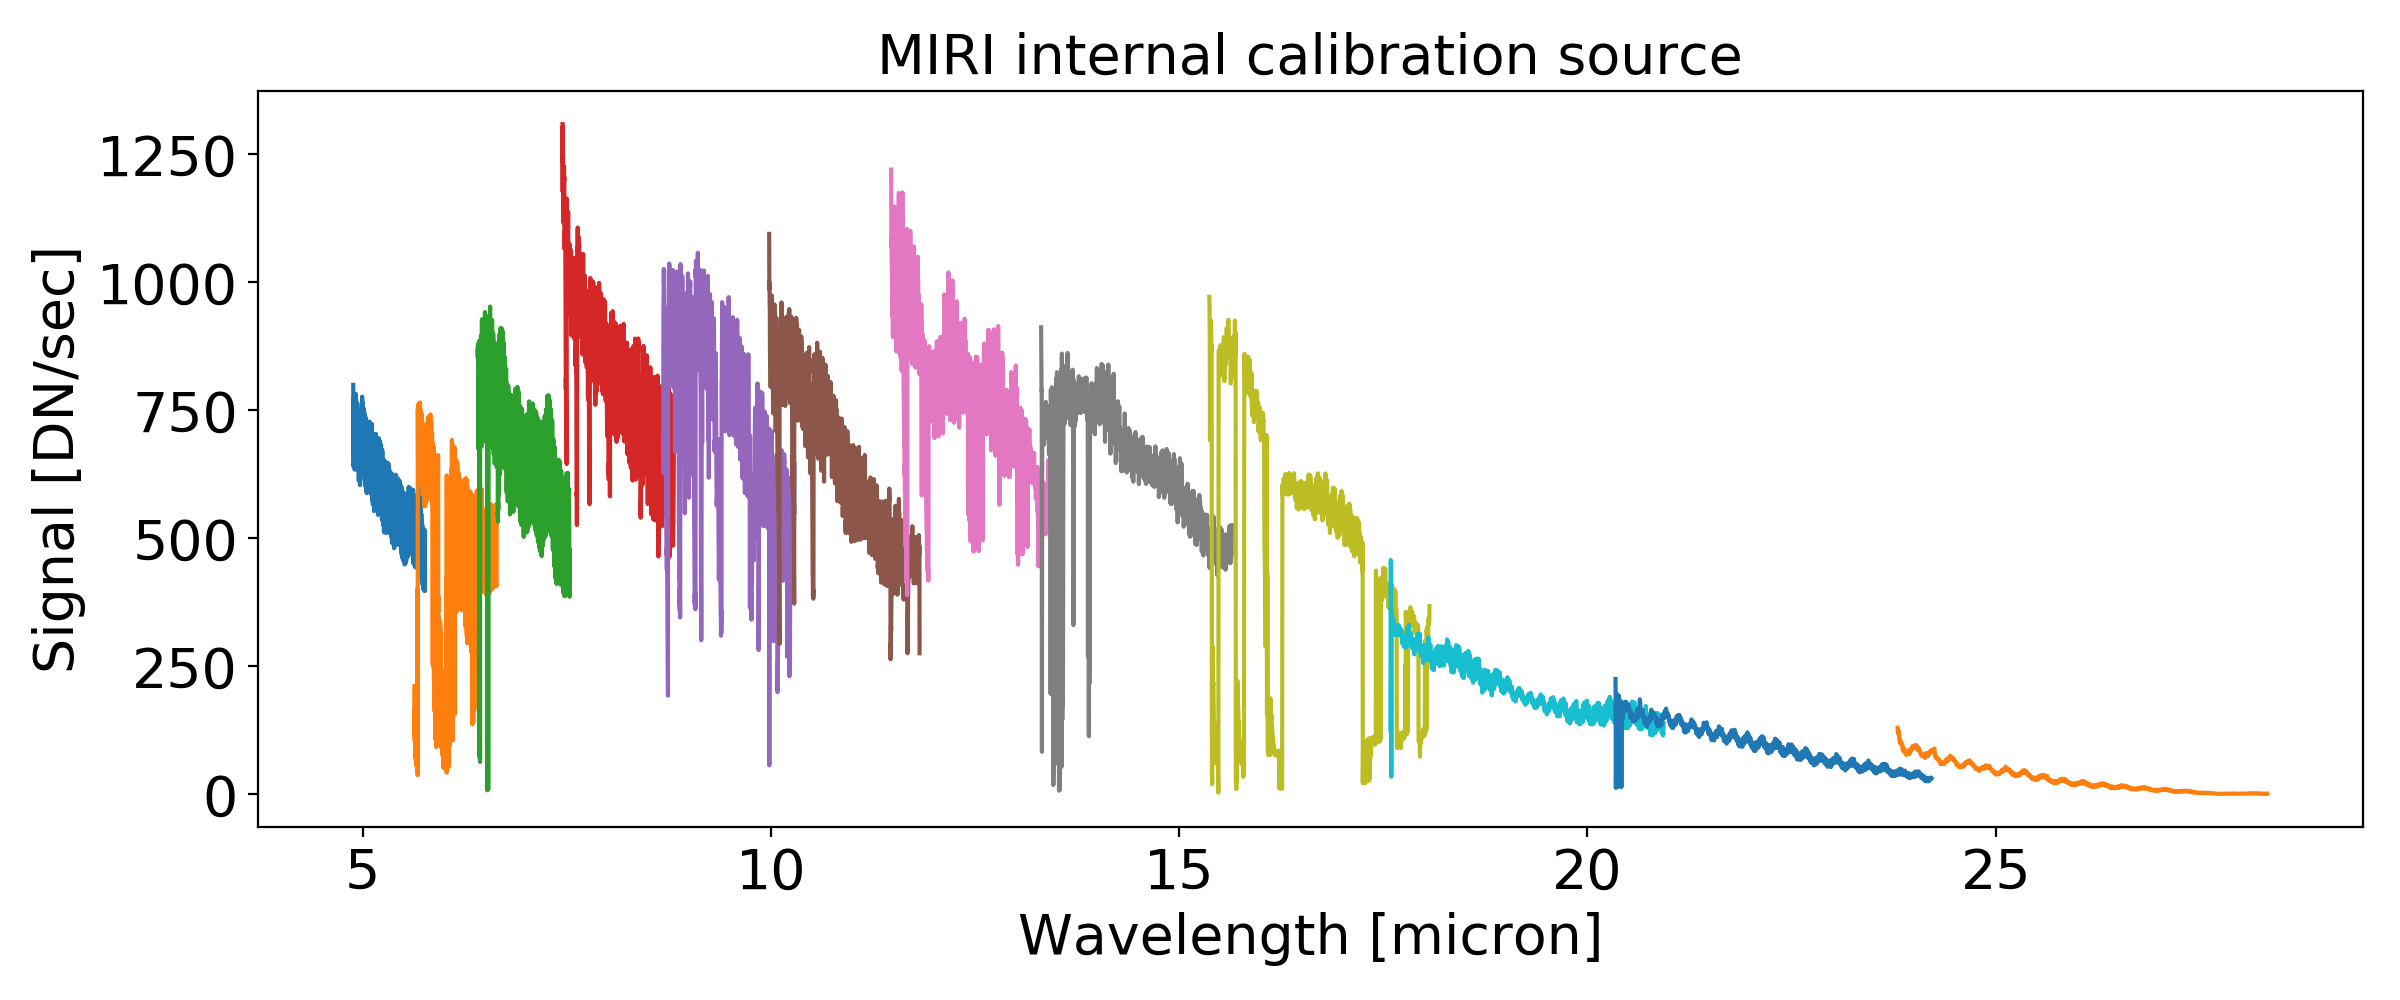

In [6]:
# Get data, transform data and plot
plt.figure(figsize=(12,5))
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    source_sci = mrsobs.MIRI_internal_calibration_source_nonlinearity_correction(lvl2path,band)
    
    d2cMaps   = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)
    lambdaMap = d2cMaps['lambdaMap']
    nslices   = d2cMaps['nslices']
    
    # Pixel trace in MRS slice
    ypos,xpos   = funcs.detpixel_trace(band,d2cMaps,sliceID=nslices/2,alpha_pos=1.)
    
    plt.plot(lambdaMap[ypos,xpos],source_sci[ypos,xpos])

plt.title('MIRI internal calibration source')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Signal [DN/sec]')
plt.tight_layout()